Import all packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Import datasets and setting indexes

In [ ]:
# Load training (train) and test (test) data
test_data = pd.read_csv('Project_test_dataset.csv')
test_data.head()

,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element
0,836,Magi Academy,female,39.0,1,1,83.1583,Mystical Chamber,Eldertree Enclave,16,Fire
1,323,Witchcraft Institute,female,30.0,0,0,12.3500,NaN,Arcan Institute,1,Earth
2,117,Sorcery School,male,70.5,0,0,7.7500,NaN,Arcan Institute,9,Earth
3,444,Witchcraft Institute,female,28.0,0,0,13.0000,NaN,Mystic Academy,9,Air
4,619,Witchcraft Institute,female,4.0,2,1,39.0000,Python Quarters,Mystic Academy,8,Water


In [ ]:
test_data = test_data.set_index('Student ID')

In [ ]:
train_data = pd.read_csv('Project_train_dataset.csv')
train_data.head()

,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
0,1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
1,2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
2,3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
3,5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
4,6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


In [ ]:
train_data = train_data.set_index('Student ID')


Check if there is missing data.

In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 836 to 653
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   176 non-null    object 
 1   Student Gender            176 non-null    object 
 2   Experience Level          145 non-null    float64
 3   Student Siblings          176 non-null    int64  
 4   Student Family            176 non-null    int64  
 5   Financial Background      176 non-null    float64
 6   School Dormitory          49 non-null     object 
 7   School of Origin          176 non-null    object 
 8   Student Social Influence  176 non-null    int64  
 9   Favourite Study Element   176 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.1+ KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          567 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          153 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


Fill missing values

In [ ]:
XL_train = train_data['Experience Level']
XL_train = XL_train.dropna()
XL_test = test_data['Experience Level']
XL_test = XL_test.dropna()

In [ ]:
m_train = round(XL_train.mean())
m_test = round(XL_test.mean())

In [ ]:
train_data['Experience Level'].fillna(m_train, inplace=True)
train_data['School Dormitory'].fillna('Unknown', inplace=True)
test_data['Experience Level'].fillna(m_test, inplace=True)
test_data['School Dormitory'].fillna('Unknown', inplace=True)

Check the importance of categorical columns for the prediction

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):
    '''receive as arguments the dataset of independent variables, the target,
    the name of each independent variable and the alpha defined. This function will
    follow the steps of chi-square to check if a independent variable is an important predictor'''

    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
train_data_c = train_data.select_dtypes(include=['object'])
for var in train_data_c:
    TestIndependence(train_data_c[var],train_data['Admitted in School'], var)

Program is IMPORTANT for Prediction
Student Gender is IMPORTANT for Prediction
School Dormitory is IMPORTANT for Prediction
School of Origin is IMPORTANT for Prediction
Favourite Study Element is NOT an important predictor. (Discard Favourite Study Element from model)


Change categorical values to numeric

In [ ]:
train_data.loc[train_data['School Dormitory'] == 'Unknown', 'School Dormitory'] = 0
train_data.loc[train_data['School Dormitory'] == 'Mystical Chamber', 'School Dormitory'] = 1
train_data.loc[train_data['School Dormitory'] == 'Cottage Chamber', 'School Dormitory'] = 2
train_data.loc[train_data['School Dormitory'] == 'Dragon Room', 'School Dormitory'] = 3
train_data.loc[train_data['School Dormitory'] == 'Tangerine Rooms', 'School Dormitory'] = 4
train_data.loc[train_data['School Dormitory'] == 'Python Quarters', 'School Dormitory'] = 5
train_data.loc[train_data['School Dormitory'] == 'Grand Chambers', 'School Dormitory'] = 6
train_data['School Dormitory'] = train_data['School Dormitory'].astype(int)
test_data.loc[test_data['School Dormitory'] == 'Unknown', 'School Dormitory'] = 0
test_data.loc[test_data['School Dormitory'] == 'Mystical Chamber', 'School Dormitory'] = 1
test_data.loc[test_data['School Dormitory'] == 'Cottage Chamber', 'School Dormitory'] = 2
test_data.loc[test_data['School Dormitory'] == 'Dragon Room', 'School Dormitory'] = 3
test_data.loc[test_data['School Dormitory'] == 'Tangerine Rooms', 'School Dormitory'] = 4
test_data.loc[test_data['School Dormitory'] == 'Python Quarters', 'School Dormitory'] = 5
test_data.loc[test_data['School Dormitory'] == 'Grand Chambers', 'School Dormitory'] = 6
test_data['School Dormitory'] = test_data['School Dormitory'].astype(int)

In [ ]:
train_data.loc[train_data['School of Origin'] == 'Mystic Academy', 'School of Origin'] = 1
train_data.loc[train_data['School of Origin'] == 'Eldertree Enclave', 'School of Origin'] = 2
train_data.loc[train_data['School of Origin'] == 'Arcan Institute ', 'School of Origin'] = 3
train_data['School of Origin'] = train_data['School of Origin'].astype(int)
test_data.loc[test_data['School of Origin'] == 'Mystic Academy', 'School of Origin'] = 1
test_data.loc[test_data['School of Origin'] == 'Eldertree Enclave', 'School of Origin'] = 2
test_data.loc[test_data['School of Origin'] == 'Arcan Institute ', 'School of Origin'] = 3
test_data['School of Origin'] = test_data['School of Origin'].astype(int)

In [ ]:
train_data.loc[train_data['Program'] == 'Sorcery School', 'Program'] = 1
train_data.loc[train_data['Program'] == 'Magi Academy', 'Program'] = 2
train_data.loc[train_data['Program'] == 'Witchcraft Institute', 'Program'] = 3
train_data['Program'] = train_data['Program'].astype(int)
test_data.loc[test_data['Program'] == 'Sorcery School', 'Program'] = 1
test_data.loc[test_data['Program'] == 'Magi Academy', 'Program'] = 2
test_data.loc[test_data['Program'] == 'Witchcraft Institute', 'Program'] = 3
test_data['Program'] = test_data['Program'].astype(int)

In [ ]:
train_data.loc[train_data['Student Gender'] == 'male', 'Student Gender'] = 1
train_data.loc[train_data['Student Gender'] == 'female', 'Student Gender'] = 2
train_data['Student Gender'] = train_data['Student Gender'].astype(int)
test_data.loc[test_data['Student Gender'] == 'male', 'Student Gender'] = 1
test_data.loc[test_data['Student Gender'] == 'female', 'Student Gender'] = 2
test_data['Student Gender'] = test_data['Student Gender'].astype(int)

In [ ]:
test_data = test_data.drop('Favourite Study Element', axis = 1)
train_data = train_data.drop('Favourite Study Element', axis = 1)
train_data.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Admitted in School
Student ID,,,,,,,,,,
1,1,1,22.0,1,0,7.2500,0,1,18,0
2,2,2,38.0,1,0,71.2833,2,2,7,1
3,1,2,26.0,0,0,7.9250,0,1,12,1
5,1,1,35.0,0,0,8.0500,0,1,12,0
6,1,1,30.0,0,0,8.4583,0,3,11,0


In [ ]:
test_data.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence
Student ID,,,,,,,,,
836,2,2,39.0,1,1,83.1583,1,2,16
323,3,2,30.0,0,0,12.3500,0,3,1
117,1,1,70.5,0,0,7.7500,0,3,9
444,3,2,28.0,0,0,13.0000,0,1,9
619,3,2,4.0,2,1,39.0000,5,1,8


Split train dataset to train and validation.

In [ ]:
# Separates the characteristics (X) and the target variable (y) in the training set.
X = train_data.drop('Admitted in School', axis=1)
y = train_data['Admitted in School']

Check correlation between columns

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [ ]:
cor_spearman = X.corr(method ='spearman')
cor_spearman

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence
Program,1.000000,0.091574,0.242117,0.021903,0.023696,0.485104,0.316454,-0.119414,0.033376
Student Gender,0.091574,1.000000,-0.085479,0.230445,0.268053,0.257183,0.114238,0.101372,0.034525
Experience Level,0.242117,-0.085479,1.000000,-0.136969,-0.221692,0.131906,0.238594,0.029001,0.024531
Student Siblings,0.021903,0.230445,-0.136969,1.000000,0.455728,0.453019,0.047579,-0.005491,0.018132
Student Family,0.023696,0.268053,-0.221692,0.455728,1.000000,0.401566,0.065432,-0.057013,0.069643
Financial Background,0.485104,0.257183,0.131906,0.453019,0.401566,1.000000,0.498929,-0.009448,0.040961
School Dormitory,0.316454,0.114238,0.238594,0.047579,0.065432,0.498929,1.000000,0.063013,0.018540
School of Origin,-0.119414,0.101372,0.029001,-0.005491,-0.057013,-0.009448,0.063013,1.000000,0.094333
Student Social Influence,0.033376,0.034525,0.024531,0.018132,0.069643,0.040961,0.018540,0.094333,1.000000


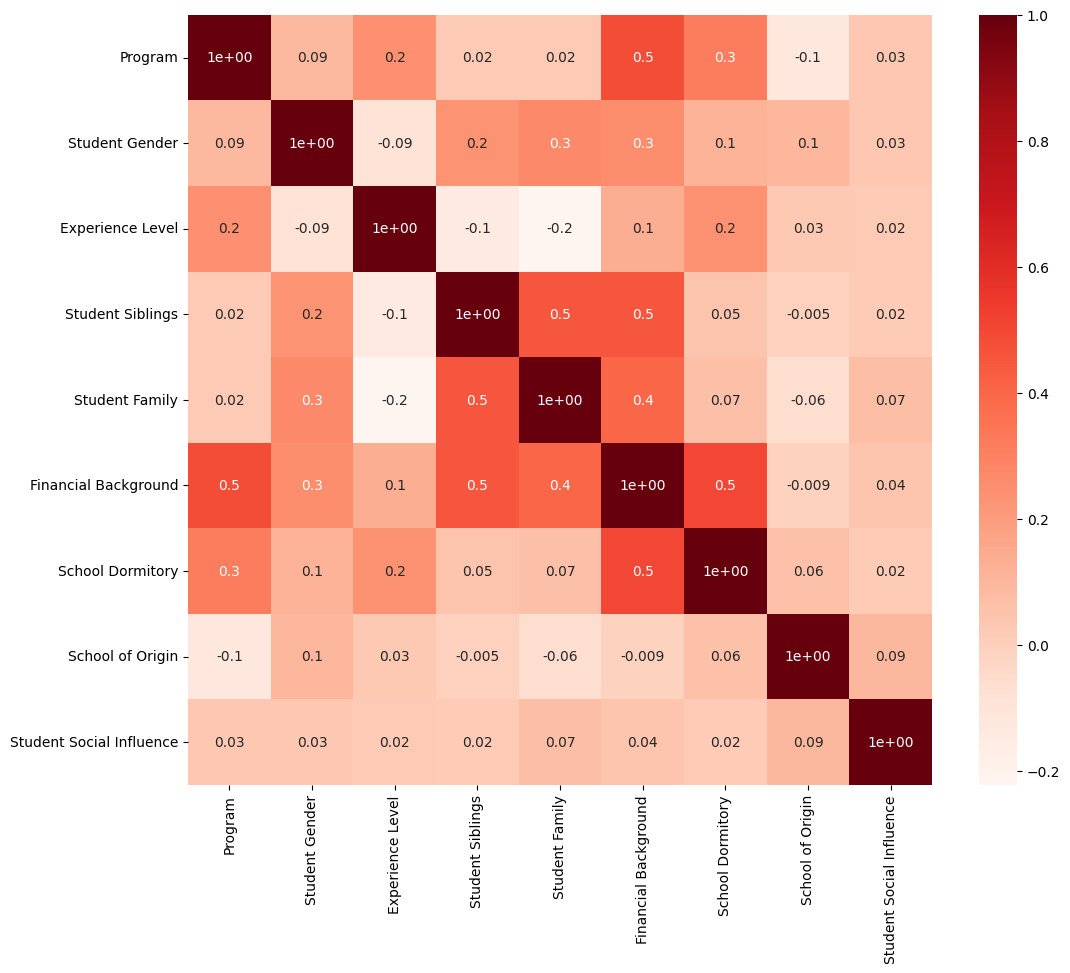

In [ ]:
cor_heatmap(cor_spearman)

In [ ]:
# Step 4: Division into training and validation set (optional)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

We choose Logistic Regression, because it is a simple yet effective model for binary classification tasks. It's a good starting point because it's easy to implement and interpret, making it suitable for understanding the impact of different features on the admission process.

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
f1_lr = f1_score(y_val, y_pred_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We choose Random Forest Classifier, because is an ensemble learning method known for its high accuracy and robustness. It can handle a variety of feature types and is less prone to overfitting. It's suitable when you have a dataset with multiple features of varying importance.

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
f1_rf = f1_score(y_val, y_pred_rf)

We choose Gradient Boosting, because it is an ensemble technique that builds strong predictive models. XGBoost, in particular, is known for its high performance and efficiency. It can capture complex relationships and handle missing data well.

In [ ]:
# Gradient Boosting (XGBoost)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
f1_xgb = f1_score(y_val, y_pred_xgb)

 We choose SVM with RBF, because if your data is high-dimensional (many features), SVMs can be effective, particularly if there is a clear margin of separation.

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_val)
f1_svm_rbf = f1_score(y_val, y_pred_svm_rbf)

In [ ]:
print(f'F1 Score for Logistic Regression: {f1_lr}')
print(f'F1 Score for Random Forest: {f1_rf}')
print(f'F1 Score for XGBoost: {f1_xgb}')
print(f'F1 Score for SVM with RBF Kernel: {f1_svm_rbf}')

F1 Score for Logistic Regression: 0.7578947368421052
F1 Score for Random Forest: 0.7254901960784313
F1 Score for XGBoost: 0.7378640776699028
F1 Score for SVM with RBF Kernel: 0.4166666666666667
